T0= 2.575075945565404
dw0= 0.2568421052631579 wn= 7.32
перевірка наближеної формули fi= 2 ; dfi= 0.01001001001001001
наближ. -143.59592205401353
а) сума -144.2273877869698
б) через комплексні (-144.2273877869696+0j)
в) через комплексні (-144.22738778697016+6.394675100495864e-13j)
Ta= 24.450819672131146  t= 1.2225409836065573


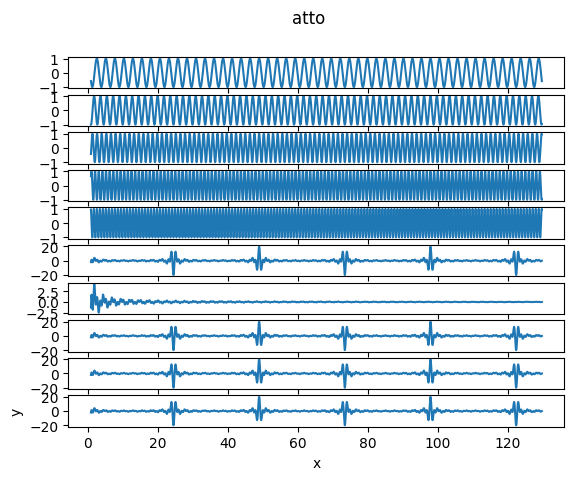

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

#s - значення точок хвилі; m
def wave(w,T,f):
    s=[0 for i in range(m)]
    for i in range(m):
        t=x1[i]
        s[i]=np.cos(w*t+f)
    return s


# ss - масив сум значень усіх хвиль, для кожного моменту часу (t); m
def sum1(y,ss):
    for t in range(m):
        #до поточних сум ss[t], додаємо  поточні значення хвилі y[t]
        ss[t]=ss[t]+y[t]
    return ss

# перевірка формули
def f_cos():
    fi=2
    m1=1000
    fi_i=np.linspace(fi,6*fi, m1)
    si=sum(np.cos(fi_i))    

    #dfi=(6*fi-fi)/m1
    dfi=(6*fi-fi)/(m1-1)  
    #наближення
    ss_f=(np.sin(fi+m1*dfi)-np.sin(fi))/dfi
    
    #комплексні
    #pi=np.pi
    #print(np.exp(1), np.exp(pi*1j))
    
    s1=(np.exp(fi*1j))*(np.exp(m1*dfi*1j)-1)/(np.exp(dfi*1j)-1)
    s2=(np.exp(-fi*1j))*(np.exp(-m1*dfi*1j)-1)/(np.exp(-dfi*1j)-1)
    
    print('перевірка наближеної формули fi=',fi, '; dfi=',dfi)
    print('наближ.',ss_f)
    print('а) сума',si) 
    print('б) через комплексні',(s1+s2)/2)
    s1=np.exp(m1*dfi*1j)-1
    s2=np.exp((fi-dfi)*1j)+np.exp(-(fi+m1*dfi)*1j)
    s3=1-np.exp(-dfi*1j)
    print('в) через комплексні',s1*s2/s3/2)

def sum2(fi,dfi,m1):
    s1=(np.exp(fi*1j))*(np.exp(m1*dfi*1j)-1)/(np.exp(dfi*1j)-1)
    s2=(np.exp(-fi*1j))*(np.exp(-m1*dfi*1j)-1)/(np.exp(-dfi*1j)-1)
    return (s1+s2)/2
    
def sum3(fi,dfi,m1):
    s1=np.exp(m1*dfi*1j)-1
    s2=np.exp((fi-dfi)*1j)+np.exp(-(fi+m1*dfi)*1j)
    s3=1-np.exp(-dfi*1j)
    return s1*s2/s3/2

def sum4(fi,dfi,m1):
    s1=np.cos(fi+dfi*(m1-1)/2)
    s2=np.sin(dfi*m1/2)
    s3=np.sin(dfi/2)
    return s1*s2/s3
# кількість хвиль
n=20
# циклічна частота, початкова
w0=2.44  #w1
T0=2*np.pi/w0
print('T0=',T0)
#набір частот (смуга частот)
w=np.linspace(w0,3*w0, n)
#print('w=',w)
#крок частоти 
#dw0=(3*w0-w0)/n
dw0=(3*w0-w0)/(n-1)
print('dw0=',dw0, 'wn=',w0*3)
# початкова фаза
f=0
# кількість точок на початковому періоді
k=200
# кількість періодів в початковій хвилі 50
# кількість точок на хвилі
m=k*50
#час
#x1=[i*T/k for i in range(m)]
x1=np.linspace(0.9,m*T0/k+0.9,m)
#виводимо кожен 5-й графік
fig, axs = plt.subplots(nrows= n//5+6 , ncols= 1)
ss1=[0 for i in range(m)]
T=[]
for j in range(n):
    # період поточної хвилі
    T.append(2*np.pi/w[j])
    #точки поточної хвилі
    y1=wave(w[j],T[j],f)
    #додаємо значення поточної хвилі до масиву сум
    ss1=sum1(y1,ss1)
    if j==0:
        axs[j].plot(x1, y1)
    elif (j+1)%5==0:
        axs[(j+1)//5].plot(x1, y1)
    #plt.plot(x1, y1,  '-ob', ms = 1)
#print('T=',T)
#виводимо масив сум
axs[n//5+1].plot(x1, ss1)
#перевірка
f_cos()
#крок кута для смуги частот Δϕ=df; 
df=dw0*x1
#наближена формула
ss2=(np.sin(w0*x1+n*df)-np.sin(w0*x1))/df
axs[n//5+2].plot(x1, ss2)
#без наближення
sss2=[]
for i in range(m):
    sss2.append(sum2(w0*x1[i],df[i],n).real)
#print(sss2[0:10])
axs[n//5+3].plot(x1, sss2)

#без наближення
sss3=[]
for i in range(m):
    sss3.append(sum3(w0*x1[i],df[i],n).real)
#print(sss2[0:10])
axs[n//5+4].plot(x1, sss3)

#без наближення
sss4=[]
for i in range(m):
    sss4.append(sum4(w0*x1[i],df[i],n).real)
#print(sss2[0:10])
axs[n//5+5].plot(x1, sss4)

fig.suptitle('atto')
#plt.axis('equal')
plt.ylabel('y')
plt.xlabel('x')

Ta=2*3.14/dw0  #відстань між піками
t=Ta/n     #ширина піка
print('Ta=',Ta,' t=',t)

plt.show()
